In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ngmodel import ureg, Q_
import pandas as pd
import numpy as np
from datetime import datetime

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from scipy.interpolate import interp1d

# Relative linear interpolation

- define date range from simulation time frame
- define a set of dates that lie within the time frame
- interpolate between those dates

In [15]:
import datetime, numpy as np
import calendar

def toTimestamp(d):
    return calendar.timegm(d.timetuple())

In [37]:
def interpolate(growth_config, date_range):
    arr1 = np.array([toTimestamp(datetime.datetime.strptime(date_val, '%Y-%m-%d')) for date_val in growth_config.keys()])
    arr2 = np.array([val for val in growth_config.values()])
    arr2
    f = interp1d(arr1,arr2, kind='cubic', fill_value='extrapolate')
    return f([toTimestamp(date_val) for date_val in date_range])

In [38]:
start_date = '2009-01-01'
end_date = '2012-12-01'
date_range = pd.date_range(start_date, end_date, freq='MS')

from dateutil import relativedelta
r = relativedelta.relativedelta( datetime.datetime.strptime(end_date, '%Y-%m-%d'), datetime.datetime.strptime(start_date,'%Y-%m-%d'))
months = r.years * 12 + r.months + 1

samples = 100

In [39]:
growth_config = {'2010-01-01':1, '2010-02-01':70 , '2010-03-01':100 , '2010-12-01':110}
r = interpolate(growth_config, date_range)
print(r)

ValueError: A value in x_new is below the interpolation range.

<IPython.core.display.Javascript object>


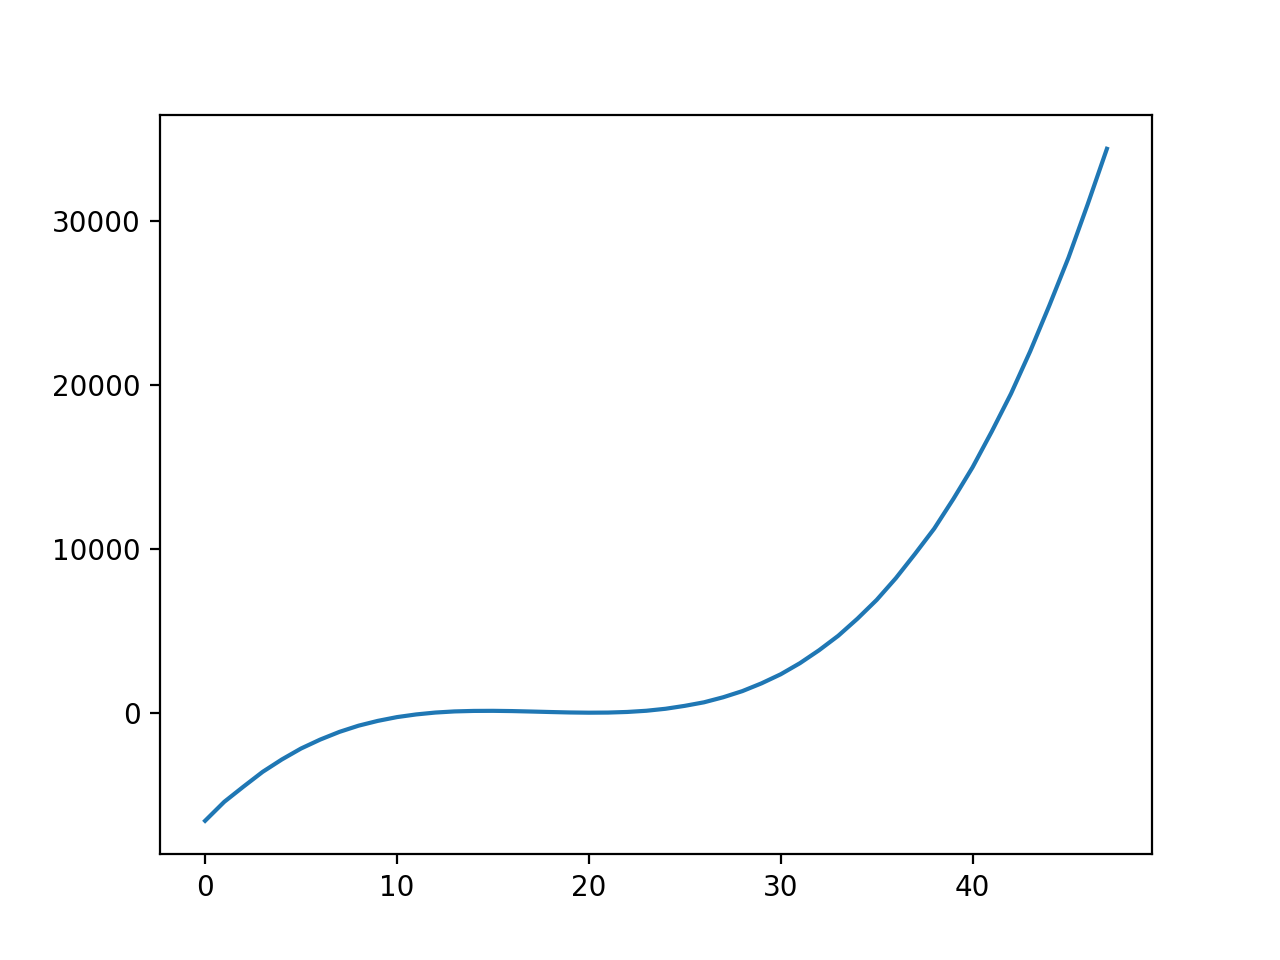

In [36]:
plt.plot(r)